In [7]:
import numpy as np
import pandas as pd
import sklearn.datasets
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from mpl_toolkits.mplot3d import axes3d, Axes3D 
#sklearn.datasets.make_classification(n_samples=10,n_features=20, n_classes=2)
#sklearn.datasets.make_blobs()

In [85]:
col_names = ['1', '2', '3']
x = pd.read_csv('datasets/DS3/train.csv',header=0)
x.info()
y = pd.read_csv('datasets/DS3/train_labels.csv',header=0)
Y = []
for i in range(1999):
    Y.append(y['1'][i])

Y_arr = np.array(Y)
x.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
1.5624    1999 non-null float64
2.8366    1999 non-null float64
3.6773    1999 non-null float64
dtypes: float64(3)
memory usage: 46.9 KB


(1999, 3)

In [9]:
pca = PCA(n_components=3)
pca.fit(x)
x_t = pca.transform(x)


In [10]:
test = SelectKBest(score_func=f_regression, k=1)
test.fit(x_t, y)
x_selected = test.transform(x)
x_selected

/home/swathi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.8366 ],
       [-1.5279 ],
       [ 1.9586 ],
       ..., 
       [ 2.2353 ],
       [ 0.73476],
       [ 0.70924]])

In [11]:
x_test = pd.read_csv('datasets/DS3/test.csv',names=col_names)
y_test = pd.read_csv('datasets/DS3/test_labels.csv',names=['1'])
pca = PCA(n_components=3)
pca.fit(x_test)
x_test = pca.transform(x_test)
test = SelectKBest(score_func=f_regression, k=1)
test.fit(x_test, y_test)
x_test_t = test.transform(x_test)


/home/swathi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:

linearRegression = LinearRegression()
model = linearRegression.fit(x_selected, y)
print np.mean((y_test-linearRegression.predict(x_test_t))**2)
linearRegression.score(x_test_t, y_test)


1    0.25
dtype: float64


0.0

/home/swathi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/swathi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/swathi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


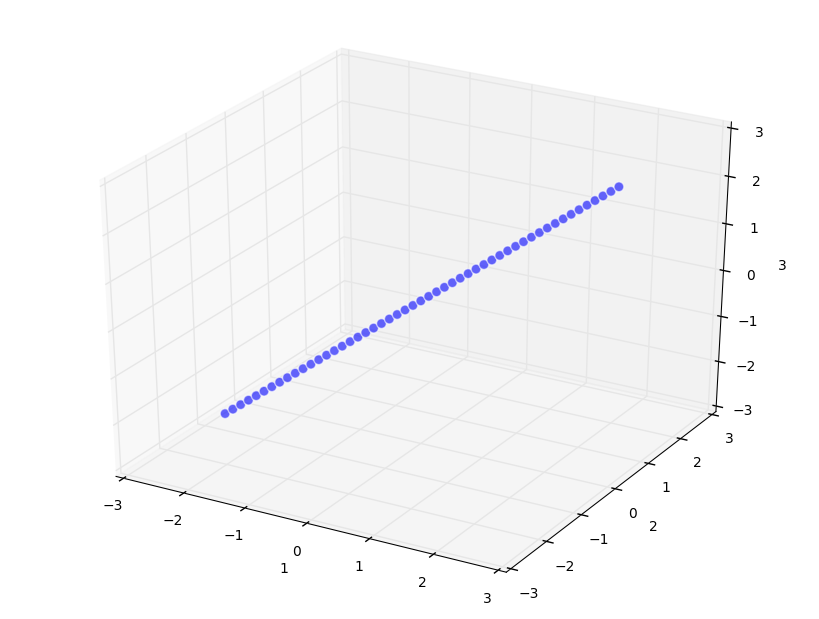

In [23]:
##3 D Visualization
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
xs = x['1']
ys = x['2']
zs = x['3']


ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')


(1999, 3)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

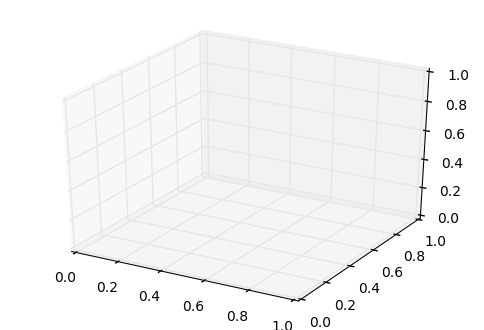

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

rs = np.random.RandomState(1234)
n_samples = 200
# X is the input features by row.
#X = np.zeros((200,3))
#X[:n_samples/2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples/2)
#X[n_samples/2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples/2)
# Y is the class labels for each row of X.
#Y = np.zeros(n_samples); Y[n_samples/2:] = 1
# Fit the data with an svm
svc = SVC(kernel='linear')
#x = x.values
print x.shape
svc.fit(x,Y_arr)


# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should for the last coordinate to plot
# the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,Y_arr = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,Y_arr))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()
'''

In [88]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
print Y

[[-6.         -6.         -6.         -6.         -6.         -6.         -6.
  -6.         -6.         -6.         -6.         -6.         -6.         -6.
  -6.         -6.         -6.         -6.         -6.         -6.         -6.
  -6.         -6.         -6.         -6.         -6.         -6.         -6.
  -6.         -6.        ]
 [-5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069
  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069
  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069
  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069
  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069  -5.5862069 ]
 [-5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379
  -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379
  -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379
  -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.17241379 -5.1724137

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
1.5624    1999 non-null float64
2.8366    1999 non-null float64
3.6773    1999 non-null float64
dtypes: float64(3)
memory usage: 46.9 KB


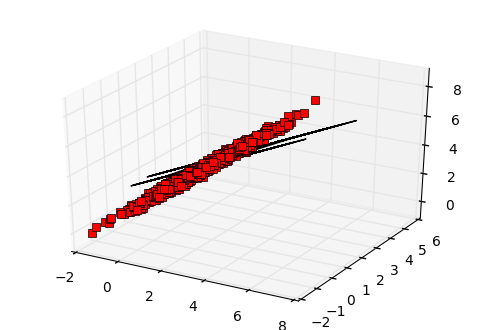

In [94]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

col_names = ['1', '2', '3']
x = pd.read_csv('datasets/DS3/train.csv',header=0)
x.info()
y = pd.read_csv('datasets/DS3/train_labels.csv',header=0)
Y = []
Y_uni = []
for i in range(1999):
    a = y['1'][i]
    ls = [a, a, a]
    Y.append(ls)
    Y_uni.append(a)
Y_mesh = np.array(Y)
Y_arr = np.array(Y_uni)
X = np.array(x)
# Generate some fake data.
#n_samples = 200
# X is the input features by row.
#X = np.zeros((200,3))
#print X.shape
#X[:n_samples/2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples/2)
#X[n_samples/2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples/2)
# Y is the class labels for each row of X.
#Y = np.zeros(n_samples); Y[n_samples/2:] = 1
#print Y.shape
# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y_arr)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should for the last coordinate to plot
# the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]) / svc.coef_[0][2]

#tmp = np.linspace(-2,2,51)
#x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y_mesh, z(X,Y_mesh))
ax.plot3D(X[Y_arr==0,0], X[Y_arr==0,1], X[Y_arr==0,2],'ob')
ax.plot3D(X[Y_arr==1,0], X[Y_arr==1,1], X[Y_arr==1,2],'sr')
plt.show()

In [91]:
col_names = ['1', '2', '3']
x = pd.read_csv('datasets/DS3/train.csv',header=0)
x.info()
y = pd.read_csv('datasets/DS3/train_labels.csv',header=0)
Y = []
for i in range(1999):
    a = y['1'][i]
    ls = [a, a, a]
    
    Y.append(ls)
print Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
1.5624    1999 non-null float64
2.8366    1999 non-null float64
3.6773    1999 non-null float64
dtypes: float64(3)
memory usage: 46.9 KB
[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1

In [73]:
Y_arr.shape

(51, 51)

In [5]:
##3 D Visualization
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
axarr[idx[0], idx[1]].set_title(tt)



NameError: name 'clf' is not defined

TypeError: Input z must be a 2D array.

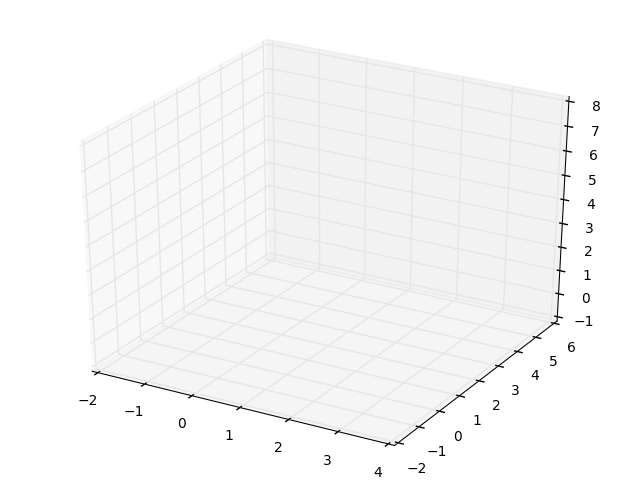

In [53]:
fig = plt.figure(figsize=(8,6))
pi = 3.14
ax = fig.add_subplot(1,1,1, projection='3d')
X = df['1']
Y = df['2']
Z = df['3']
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

